# 1 Use the example Notebook for ultrasound to open the files and render the images obtained from the lab.

524288


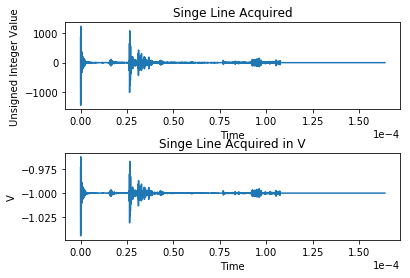

In [1]:
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

#we use a simple open command for the file (basic Python)
f = open('LabRFdata.bin','rb')   # Windows
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
Line = np.fromfile(f,count=-1,dtype=np.int16)
L=len(Line)
print(L)

f.close() #close the file
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,4096/25e6,1/25e6)  #start,stop,step
#now we plot only the first line acquired (15000 samples)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,Line[:4096])
plt.title('Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#But this is in integers, in volts we need to calculate 2Vpp -> 65535=1V and 0=-1V
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.subplot(212)
plt.plot(x,LineF[:4096])
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

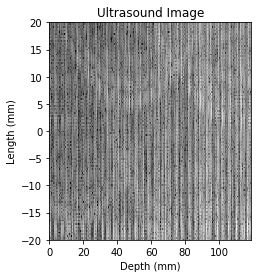

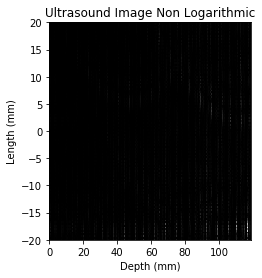

In [2]:
f = open('LabRFdata.bin','rb')   # Windows#Eliminating dc
Lines = np.fromfile(f,count=-1,dtype=np.int16)
TL=len(Lines)/4096
Lines=Lines-np.mean(Lines)
LinesRF=Lines.reshape(int(TL),4096,order='F').copy()#Compensating
h=x*1450
ffatt=np.exp(2*4.96*h)
LinesRFC=LinesRF*ffatt
LinesRFE=hilbert(LinesRFC)
LinesRFE=abs(LinesRFE)

#images need to be logarithmic so we can see all the contrast
Mx=LinesRFE.max()
Image=20*np.log10(LinesRFE/Mx)
ImageBW=LinesRFE

#the line axi
s=np.linspace(-20,20,128)
#Plotting
d=h/2*1000  #answer: why are we doing this here?
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, Image[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(32./10)  #this is because I know the image was 20mm in lenght so 26 lines=20mm or a ratio 10/13
plt.title('Ultrasound Image')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageBW[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(32./10)
plt.title('Ultrasound Image Non Logarithmic')
plt.xlabel('Depth (mm)')
plt.ylabel('Length (mm)')

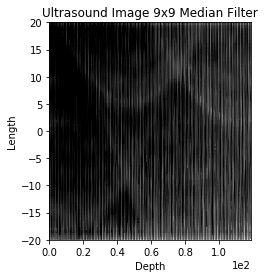

In [3]:
from scipy.signal import medfilt

#we cut anything below -60dB
cutdb=-60
inx=np.where(Image<cutdb)
Image[inx]=cutdb

#and we filter using a 9x9 median filter
ImageF=medfilt(Image,9)

#Plotting
d=h/2*1000
plt.figure()
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(d, s, ImageF[:, :])
plt.axis([d.min(),d.max(),s.min(),s.max()])
plt.axes().set_aspect(32./10)
plt.title('Ultrasound Image 9x9 Median Filter')
plt.xlabel('Depth')
plt.ylabel('Length')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# 2  What is the frequency that is observed in your signal?

The maximum is 0.000082 and it is found at index 125312 which is the frequency 5.975342e+06


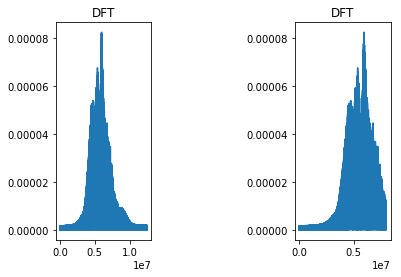

In [4]:
#Eliminating dc
LineF-=np.mean(LineF)
#Now let's obtain the spectrum
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,25e6/2,25e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing

#preparing the plotting
plt.subplots_adjust( wspace = 1.5 )
plt.subplot(121)
L1=len(Pyy)/2
L2=int(L1)
plt.plot(f[:L2], Pyy[:L2])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Zooming into just less than 8MHz
inx=np.where(f>8e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Let's obtain the frequency at which the maximum is observed
#Remember we have a DFT which is mirrored, so we only work with half
PyyM=Pyy[:L2]
mm=np.argmax(PyyM) #this gives the index where the max is found
print("The maximum is %f and it is found at index %d which is the frequency %e" % (max(PyyM),mm,f[mm]))

## From the output of the dicrete fourier transform we can find that the frequency is 4.78 MHz.

# 3 What is the bandwidth observed in your signal?

Bnawidth observed in our signal. 

Formula for finding bandwidth by taking 3dB down on both the sides from the DFT of te signal. 


$$        3 == 20 log ( V/ 0.00082)    $$


'V' is 0.00011582

taking 3 dB dwon from both sides.

thus the bandwidth is from   5.6 MHz to  6.3 MHz

# 4 What is the difference in the images obtained using different acquisition parameters?  Explain the physical reasons for these differences.

By using different acquisition parameters we are changing the speed of sound. The speed of sound in water is 1498 m/sec, by applying the formula of the speed of the sound in any medium as follows :-

$$         C=(s/p)^1/2 $$

here s is stifness of the muscle tissue 

p is density of water,

hence by changing the speed of sound, by increasing the speed of sound there will be more reflcetion from the tissues.


# 5  DICOM  file is provided on GitHub under the name US-Mono-2-8-8x-execho.dcm from an ultrasound machine.  Modify the DICOM notebook from the course to open this  file.  Explain any modifications on the code you needed to make to render the image.

[0, 119, 0, 127]

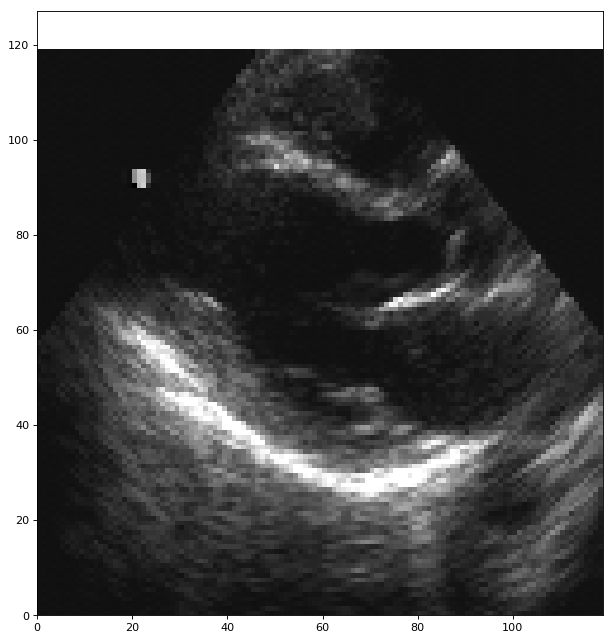

In [5]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('US-MONO.dcm')
ConstPixelDims = (int(RefDs.NumberofFrames),int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('US-MONO.dcm')
ArrayDicom[:,:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(y, x, np.flipud(ArrayDicom[1,:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])

## Modifying the code by adding third dimension in the array and as the name of file was too long we need to rename it.

# 6   Discuss what is the difference between the data you used to render your image and a DICOM ? why do you think we use DICOM and not directly transfer data in this raw matter?

The difference between the data we render for our image and a dicom is that the data to render the image are just raw values of voltage (unassigned integer values) for discrete time values. Whereas dicom consists of pixel information where every pixel has a 8 bit data that is used to render the image.We use Dicom for that due to its processing speed .i.e. as we just have to provide the pixel information and image would be launched.

# 7   Discuss  what  would  be  the  advantage/disadvantage(s)  of  using  raw  data  over  DICOM  in ultrasound?

RAW DICOM corresponds to data on which fewer display processing have been applied.More precisely, RAW DICOM are encoded on 12bits without compression, whereas "classic" DICOM images are generally screenshots encoded on 8bits with jpeg lossy compression. Moreover, RAW DICOM are not saturated for high values and not subject to tresholding for low values.Generally, RAW DICOM are proprietary formats that require the use of proprietary softwares to be analyzed, because the DICOM field containing image information is encrypted.